In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
#from signal_model_utilities_v3b import *

In [2]:
x_sep = 13.9#10.39
height_sep=-15.23#-15.7
stroke=-202
frequency=3
lambda_val=9.74#20
axis="z"
offset_y=4.9
yuk_or_grav="yuk"
alpha=1
bead_size=7.6
signal_sim49 = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)

Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force


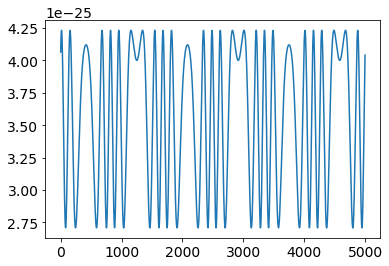

In [3]:
plt.plot(signal_sim49[1])
#plt.plot(signal_sim149[1])


In [4]:
fft_angles_1=np.angle(np.fft.rfft(signal_sim49[1]))
#fft_angles_2=np.angle(np.fft.rfft(signal_sim149[1]))

for harmonic in np.arange(3,42,3):
    print(fft_angles_1[harmonic]) # my simulation, from pure sine
    #print("\n")
    #print(fft_angles_2[harmonic]) # my simulation, from pure sine


1.57079632679
-3.14159265359
-1.57079632679
2.38793165899e-16
-1.57079632679
-3.14159265359
1.57079632679
-3.14159265359
-1.57079632679
5.89099013243e-16
-1.57079632679
8.82525551596e-16
-1.57079632679


In [ ]:
fft_angles = np.angle(np.fft.rfft(signal_sim[1]))
fft_angles2 = np.angle(np.fft.rfft(signal2[3][0:5000]))


signal_sim_10 = repeat(signal_sim[1],10)
plt.plot(signal_sim_10)

In [7]:
signal2=  np.load("test_signal.npy")

In [11]:
fft_angles = np.angle(np.fft.rfft(signal_sim49[1]))
fft_angles2 = np.angle(np.fft.rfft(signal2[3][0:5000]))

In [12]:
for harmonic in np.arange(3,42,3):
    print(harmonic)
    print(fft_angles[harmonic]) # my simulation, from pure sine
    #s49 = np.abs(np.fft.rfft(signal_sim49[1]))
    #print(s49[harmonic])
    #c49=np.abs(np.fft.rfft(signal2[3][0:5000]))
    #print(c49[harmonic])

3
1.57079632679
6
-3.14159265359
9
-1.57079632679
12
2.38793165899e-16
15
-1.57079632679
18
-3.14159265359
21
1.57079632679
24
-3.14159265359
27
-1.57079632679
30
5.89099013243e-16
33
-1.57079632679
36
8.82525551596e-16
39
-1.57079632679


In [13]:
for harmonic in np.arange(3,42,3):
    print(fft_angles2[harmonic]) # chas from real drive


1.59663918004
-3.11365066555
-1.45080567503
0.0564894090526
-1.57804055908
-3.05784398287
1.68246093668
-2.98653622697
-1.3117025268
0.178967165464
-1.35240566552
0.248935878209
-1.31802432159


(0.0, 1.0)

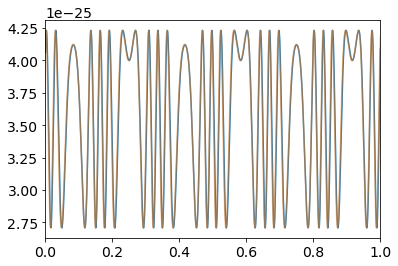

In [89]:
plt.plot(signal2[0],signal_sim_10)
plt.plot(signal2[0],signal2[3],alpha=0.5)

plt.xlim(0,1)

In [79]:
# step zero: extend to 10s
def repeat(arr, count):
    z_sig = []
    for i in range(count):
        z_sig.extend(arr)
    return z_sig

z_sig = repeat(signal1[1],10)
time_rep=np.arange(0,10,1/5000)


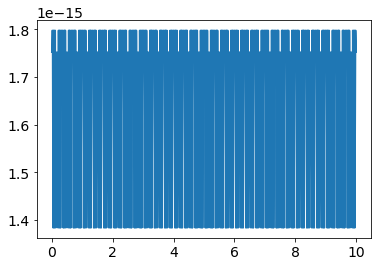

In [80]:
plt.plot(time_rep,z_sig)

In [81]:
# step one: transform
z_trans_amp = np.divide(z_sig,3.99023794e-20)

In [82]:
z_trans_amp

array([ 43916.69213771,  43916.9836056 ,  43917.85800511, ...,
        43919.31532382,  43917.85800511,  43916.9836056 ])

In [83]:
# step two: add noise or noise +bkg
with h5py.File('bck_noise.h5', 'r') as f_in:
    quad_data = np.array(f_in['quad_data'])
    data = quad_data.reshape(-1,12).T[9]
    z_sn = np.subtract(np.array(data),np.array(z_trans_amp))
    f_in.close()
    

In [84]:
np.array(data)

array([-3240672, -3242732, -3243436, ..., -3242287, -3243919, -3245437], dtype=int32)

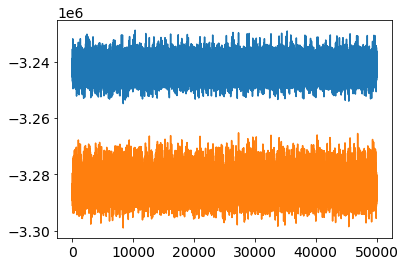

In [85]:
plt.plot(np.array(data))
plt.plot(np.array(z_sn))


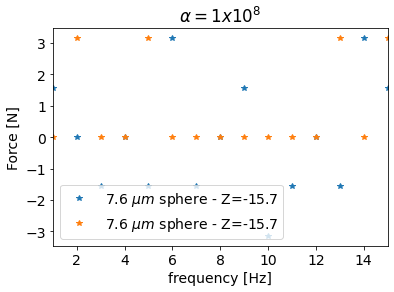

In [113]:
_,ax = plt.subplots()
#x = list(np.array(z_sn))
x2 = list(np.array(signal1[1]))
x = list(np.array(signal2[1]))



fft_angles = np.angle(np.fft.rfft(x))
fft_angles2 = np.angle(np.fft.rfft(x2))

fsamp=5000
res1=50000
res2=5000
norm1 = np.sqrt(2 / (res1* fsamp))
fft1 = np.abs(np.fft.rfft(x))*norm1/np.sqrt(10)
freqs1=np.linspace(0,int(fsamp/2),(int(res1/2))+1)    # change

norm2 = np.sqrt(2 / (res2* fsamp))
freqs2=np.linspace(0,int(fsamp/2),(int(res2/2))+1)    # change
fft2 = np.abs(np.fft.rfft(x2))*norm2


#ax.semilogy(freqs1, fft1, label='7.6 $\mu m$ sphere - Z=-15.7')
#ax.semilogy(freqs2, fft2, label='7.6 $\mu m$ sphere - Z=-15.7')

ax.plot(freqs2, fft_angles, label='7.6 $\mu m$ sphere - Z=-15.7',marker="*",linestyle="")
ax.plot(freqs2, fft_angles2, label='7.6 $\mu m$ sphere - Z=-15.7',marker="*",linestyle="")


#ax.set(xlim=(1,40), ylim=(None,None), xlabel='frequency [Hz]', ylabel='Force [N]', title=r'$\alpha=1x10^{8}$')
ax.set(xlim=(1,15), ylim=(None,None), xlabel='frequency [Hz]', ylabel='Force [N]', title=r'$\alpha=1x10^{8}$')

ax.legend()

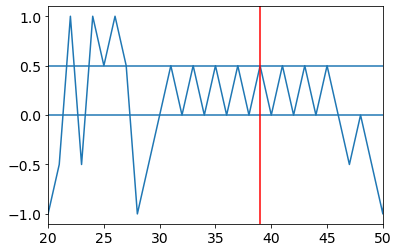

In [13]:
#plt.plot(fft_angles/np.pi)
plt.plot(fft_angles2/np.pi)
plt.xlim(20,50)
plt.axhline(0.5)
plt.axhline(0)
plt.axvline(39,color="red")

In [66]:
# step three: save to disk

with h5py.File('bck.h5', 'r') as f_in:
    quad_data = np.array(f_in['quad_data'])
    data = quad_data.reshape(-1,12).T[9]
    zs = np.array(data)/12
    quad_data.reshape(-1,12).T[9] = zs
    f_in.close()
with h5py.File('Shaking4_4444.h5', 'w') as f_out:
    f_out.create_dataset("quad_data", quad_data.shape,data=quad_data)
    f_out.close
    with h5py.File('Shaking4_4444.h5', 'r') as f:
    quad_data = np.array(f['quad_data'])

    data = quad_data.reshape(-1,12).T[9]
    z2 = np.array(data)/2
 
        

IndentationError: expected an indented block (<ipython-input-66-4d8033549a81>, line 13)

In [117]:
freqs1=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change


In [122]:
len(freqs2)

2501

In [3]:
fname = "/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_100.h5" 
BDF = BeadDataFile.BeadDataFile(fname)

In [8]:
3.8638648354724578*50


193.1932417736229

In [5]:
voltage_to_x_position(BDF.cant_pos[1][0])

194.88579461186521

71.6917383644


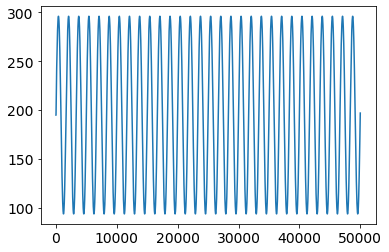

In [4]:
plt.plot(voltage_to_x_position(BDF.cant_pos[1]))
print(np.std(voltage_to_x_position(BDF.cant_pos[1])))

In [139]:
def voltage_to_x_position(voltage,slope=0.019834000085488412,offset=-0.0015000315197539749,redo=False):
    if(redo==True):
        
        pos_list=np.asarray([-0.007,4.968,9.91])
        y_err=np.asarray([0.01,0.01,0.01])
        val = np.asarray([0,250,500])
        data_x=val
        data_y=pos_list
        data_y_error=y_err
        m2=Minuit(chisquare_linear, 
             a = 100,
             b =0,
             errordef = 1,
             print_level=1)
        m2.migrad()
        print(m2.values["a"],m2.values["b"])
        slope = m2.values["a"]
        offset = m2.values["b"]
        plt.plot(val,pos_list,marker="*")
        plt.plot(val,m2.values["a"]*val+m2.values["b"])
    position=(voltage-offset)/slope
    return position

In [149]:
voltage_to_x_position(0)

0.07562929884483947

In [150]:
7.781115900070439

7.781115900070439

In [151]:
np.mean(BDF.cant_pos[0])

7.4995407995836088

In [153]:
7.781115900070439-7.4995407995836088


0.28157510048683054

In [156]:
voltage_to_x_position(0.28157510048683054)#*50


14.272215931555683

In [155]:
14.078755024341527-7.6/2


10.278755024341528

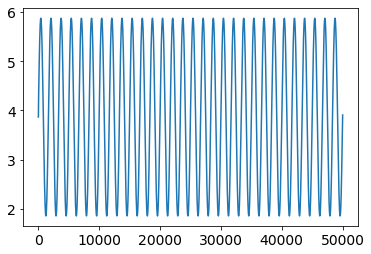

In [158]:
plt.plot(BDF.cant_pos[1])

In [159]:
BDF.cant_pos[1].mean()

3.8645992941341816

In [161]:
voltage_to_x_position(8.678617418570207-3.8645992941341816)


242.79107266310152

In [162]:
437.3 - 25 * 9.5

199.8

In [163]:
437.3-242.79107266310152


194.5089273368985

In [164]:
199.8-194.5089273368985


5.291072663101517

In [1759]:
time = np.arange(0,1,1/5000)
test = np.sin(2*np.pi*1*time)
test2 = np.sin(2*np.pi*1*time+np.pi/2)

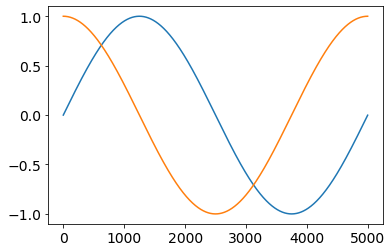

In [1760]:
plt.plot(test)

plt.plot(test2)

In [1761]:
fft = np.fft.fft(test)
fft2= np.fft.fft(test)

In [1762]:
np.angle(fft[3])
np.angle(fft2[3])

1.5157800833894788

In [1763]:
pshift1=np.pi
pshift2=np.pi/2

In [1770]:
shifted_com=np.multiply(np.exp(-1j*2*np.pi*pshift1),fft[2])
shifted_com2=np.multiply(np.exp(-1j*2*np.pi**pshift2),fft2[2])

In [1771]:
print(np.angle(shifted_com))
print(np.angle(shifted_com2))

-0.153607426073
2.60487763788


In [1766]:
fft=shifted_com
ifft = np.fft.ifft(fft)


In [1767]:
fft2=shifted_com2
ifft2 = np.fft.ifft(fft2)

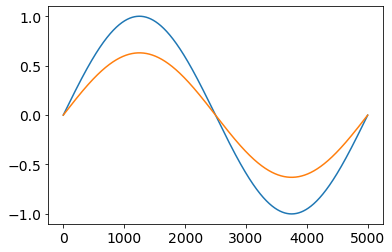

In [1769]:
plt.plot(test)
plt.plot(ifft)
#plt.plot(test2,alpha=0.5)
#plt.plot(ifft2,alpha=0.5)

In [699]:
s = np.zeros(5000)
n=12
s[n] = 1
fft_s = np.fft.fft(s)  

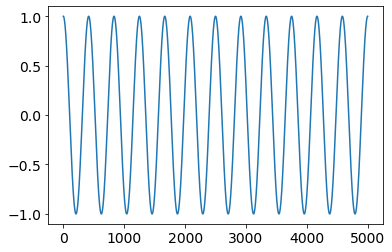

In [700]:
plt.plot(fft_s)
#plt.xlim(0,100)

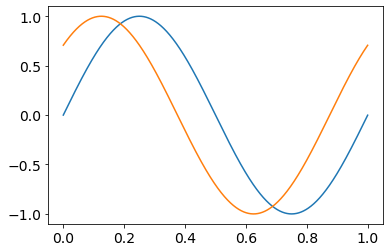

In [1559]:
t = np.arange(0,1,1/5000)
def omega(f):
    return 2*np.pi*f

v0 = np.sin(omega(1)*t+0)  
v02 = 0#np.sin(omega(6)*t+0)  
v03 = 0#np.sin(omega(6)*t+0)  

v0g = v02+v0+v03
v1 =  np.sin(omega(1)*t+np.pi/4)                                                                                             
v12 = 0#np.sin(omega(6)*t+np.pi) 
v13 = 0#np.sin(omega(6)*t+np.pi/4)  

v1g = v12+ v1+v13

plt.plot(t,v0g)
plt.plot(t,v1g)


416


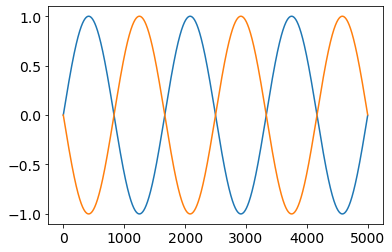

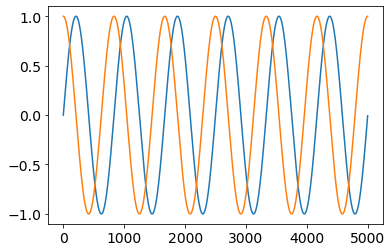

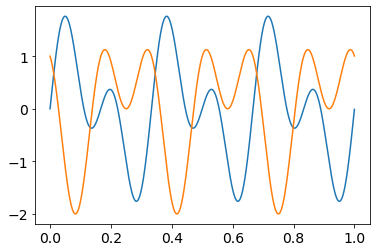

-1.57079632679 pure
1.57330960092 first shift only
-3.13782274241 both shifts


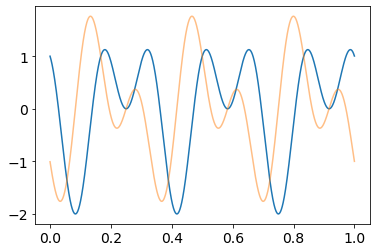

In [1730]:
t = np.arange(0,1,1/5000)
def omega(f):
    return 2*np.pi*f
shift_phase=1
shift_phase2=2
f=3
f2=6
period = 5000//(2*f)
period2= 5000//(2*f2)
print(period2)
v0 = np.sin(omega(f)*t+0)  
v02 =np.sin(omega(f2)*t+0)  
v03 = 0#np.sin(omega(6)*t+0)  

v0g = v02+v0+v03
v1 =  np.sin(omega(f)*t+np.pi/shift_phase)                                                                                             
v12 = np.sin(omega(f2)*t+np.pi/shift_phase2) 
v13 = 0#np.sin(omega(6)*t+np.pi/4)  

v1g = v12+ v1+v13
#v2g = np.sin(omega(f2)*t+np.pi/4) 

plt.plot(v0)
plt.plot(v1)
plt.show()
plt.plot(v02)
plt.plot(v12)
plt.show()

plt.plot(t,v0g)
plt.plot(t,v1g)
#plt.plot(t,v2g)

plt.show()
S = shift(5000-period//shift_phase-1, len(t))  # shift by pi (2pi = 5000), 6pi=5000)
S2 =shift(5000-period2//shift_phase-1, len(t)) # 5000/6
pure_fft = np.fft.fft(v0g)
print(np.angle(pure_fft[3]),"pure")

vs_fft_2 = np.fft.fft(v0g)*S
print(np.angle(vs_fft_2[3]),"first shift only")
vs_fft = np.fft.fft(v0g)*S*S2
print(np.angle(vs_fft[3]),"both shifts")
vs = np.fft.ifft(vs_fft)


#plt.plot(t,v0g)
plt.plot(t,v1g)
plt.plot(t,vs,alpha=0.5)
#plt.plot(t,v2g)

plt.show()

In [ ]:
## angle_listp = []
angle_lists = []

for shiftval in range(5000):
    S = shift(shiftval, len(t))  # shift by pi (2pi = 5000), 6pi=5000)
    S2 = 1#shift(5000//(2*3)-1, len(t)) # 5000/6
    pure_fft = np.fft.fft(v0g)
    vs_fft = np.fft.fft(v0g)*S#*S2
    vs = np.fft.ifft(vs_fft)

    angle_listp.append(np.angle(pure_fft[3]))
    angle_lists.append(np.angle(vs_fft[3]))


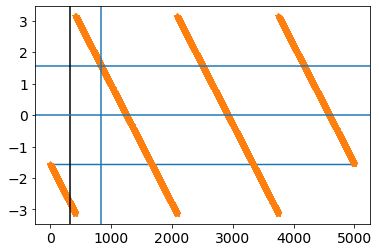

In [1385]:
plt.plot(angle_listp)
plt.plot(angle_lists,marker="*",linestyle="")
plt.axhline(1.57)
plt.axvline(5000/(3*2))
plt.axvline(5000/(3*5),color="black")
plt.axhline(0)


In [1557]:
t = np.arange(4096)*np.pi/1024                                                                              
v0 = np.sin(t)                                                                                               
v1 = np.sin(t-np.pi/4)                                                                                       
S = shift(4*1024//16-1, 4096)                                                                                  
VS = np.fft.fft(v0)*S                                                                                        
vs = np.fft.ifft(VS)                                                                                         


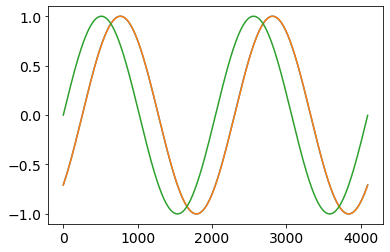

In [1558]:
plt.plot(vs)
plt.plot(v1)
plt.plot(v0)

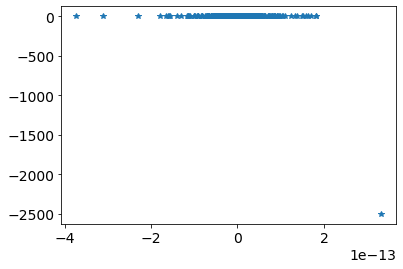

In [154]:
plt.plot(np.real(fft),np.imag(fft),marker="*",linestyle="")

(0.0, 10.0)

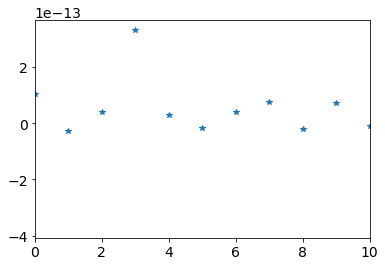

In [141]:
plt.plot(fft,linestyle="",marker="*")
plt.xlim(0,10)

In [135]:
angle[3] = np.pi

(0.0, 10.0)

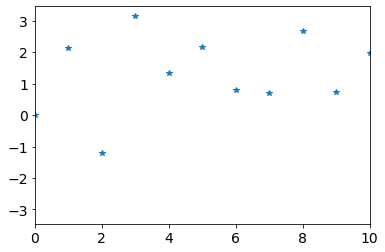

In [136]:
plt.plot(angle,linestyle="",marker="*")
plt.xlim(0,10)

In [284]:
harm_list = []
harm_list2 = []

scale = [1 for x in range(10)]
phase_shift_dummy = 5*[np.pi/2]+5*[np.pi/4]

In [285]:
for i in np.arange(3,33,3):
    index= int(i/3)-3
    func = scale[index]*np.sin(2*np.pi*i*time)
    harm_list.append(func)
harm1 = np.sum(harm_list,axis=0)    

In [286]:
for i in np.arange(3,33,3):
    index= int(i/3)-3
    func = scale[index]*np.sin(2*np.pi*i*time+phase_shift_dummy[index])
    harm_list2.append(func)
harm2 = np.sum(harm_list2,axis=0)    

In [287]:
len(harm_list)

10

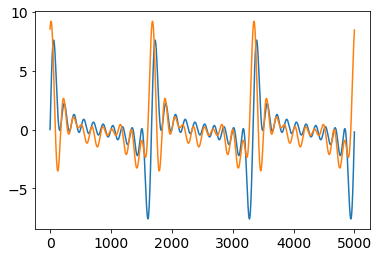

In [288]:
plt.plot(harm1)
plt.plot(np.sum(harm_list2,axis=0))


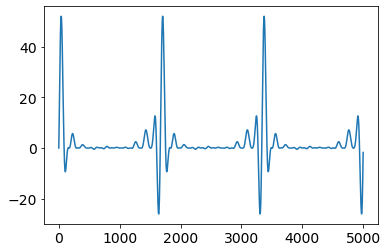

In [289]:
plt.plot(harm1*harm2)

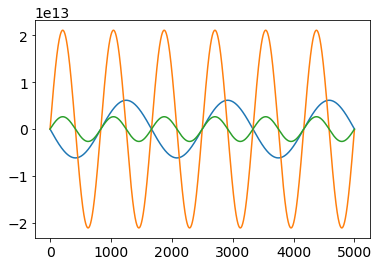

In [170]:
plt.plot(test_signal/np.sum(test_signal))
plt.plot(test_signal2/np.sum(test_signal2))
plt.plot(test_signal+test_signal2/np.sum(test_signal+test_signal2))

In [1790]:
t = np.arange(0,1,1/5000)
def omega(f):
    return 2*np.pi*f
shift_phase=1
shift_phase2=2
f=3
f2=6

v0 = np.sin(omega(f)*t+0)  
v02 =0#np.sin(omega(f2)*t+0)  
v03 = 0#np.sin(omega(6)*t+0)  

v0g = v02+v0+v03
v1 =  np.sin(omega(f)*t+np.pi/shift_phase)                                                                                             
v12 = 0#np.sin(omega(f2)*t+np.pi/shift_phase2) 
v13 = 0#np.sin(omega(6)*t+np.pi/4)  

v1g = v12+ v1+v13
#v2g = np.sin(omega(f2)*t+np.pi/4) 


plt.show()

pure_fft = np.fft.fft(v0g)




plt.show()

In [1877]:
print(np.angle(pure_fft[3]))

-1.57079632679


In [1878]:
np.real(pure_fft[3])

2.0474804448322944e-13

In [1879]:
np.imag(pure_fft[3])

-2500.0

In [1880]:
np.arctan2(np.imag(pure_fft[3]),np.real(pure_fft[3]))

-1.5707963267948966

In [1881]:
y=np.asarray(np.imag(pure_fft[3]))
x=np.asarray(np.real(pure_fft[3]))
np.arctan(y,x)

array(-1.57039632681623)

In [1882]:
np.tan(-1.57039632681623) *x

3925.9908170408798

In [1883]:
y2=-3926.9908169875466
x=np.asarray(np.real(pure_fft[3]))
np.arctan(y2,x)

array(-1.570541678891454)

In [572]:
def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))


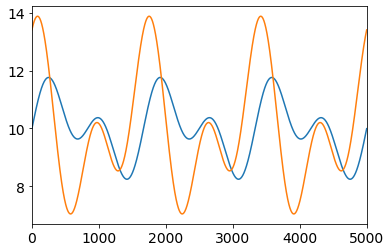

In [617]:
duration = 1
t=np.arange(0,duration,1/5000)
shift_phase = np.pi/2

test_sin = 1*np.sin(2*np.pi*3*t)+1*np.sin(2*np.pi*6*t)+10
test_shift_sin = 2*np.sin(2*np.pi*3*t+shift_phase)+2*np.sin(2*np.pi*6*t+shift_phase/2)+10

plt.plot(test_sin)
plt.xlim(0,5000)
plt.plot(test_shift_sin)

In [618]:
pure_fft=np.fft.rfft(test_sin)
shift_fft=np.fft.rfft(test_shift_sin)

In [619]:
print(pure_fft[3], shift_fft[3],pure_fft[6], shift_fft[6])
print(np.real(pure_fft[3]),np.real(shift_fft[3]),np.real(pure_fft[6]),np.real(shift_fft[6]))
print(np.angle(pure_fft[3]),np.angle(shift_fft[3]),np.angle(pure_fft[6]),np.angle(shift_fft[6]))
print(np.abs(pure_fft[3]),np.abs(shift_fft[3]),np.abs(pure_fft[6]),np.abs(shift_fft[6]))

(4.09373528303e-13-2500j) (5000+7.28639041461e-13j) (5.28778242626e-13-2500j) (3535.53390593-3535.53390593j)
4.09373528303e-13 5000.0 5.28778242626e-13 3535.53390593
-1.57079632679 1.45727808292e-16 -1.57079632679 -0.785398163397
2500.0 5000.0 2500.0 5000.0


In [623]:
print(len(t))
normed = np.abs(pure_fft)#*fft_norm(len(t),5000)*np.sqrt(2)/np.sqrt(duration)
normed2 = np.abs(shift_fft)#*fft_norm(len(t),5000)*np.sqrt(2)/np.sqrt(duration)

#complexconh = fft_norm(len(t),5000)**2*(pure_fft * pure_fft.conj()).real

5000


In [624]:
print(normed[6])
print(normed2[6])

2500.0
5000.0


(0.0, 10.0)

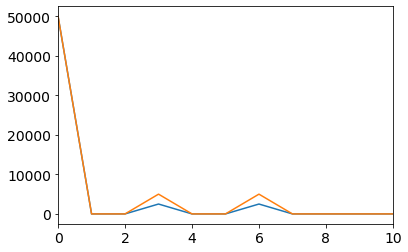

In [625]:
freqs=np.linspace(0,int(5000/2),(int(len(t)/2))+1)    # change

plt.plot(freqs,normed)
plt.plot(freqs,normed2)


#plt.axhline(5,color="red")
#plt.axhline(2,color="black")
#plt.ylim(1e-1,1e3)
plt.yscale("linear")
plt.xlim(0,10)

In [651]:
test_ifft=np.fft.irfft(2*pure_fft)
shift_ifft=np.fft.irfft(shift_fft)

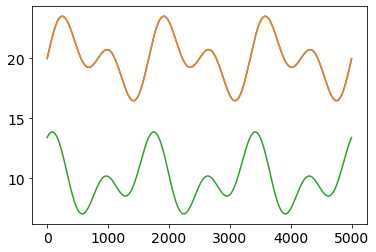

In [652]:
plt.plot(test_ifft)
plt.plot(2*test_sin)
plt.plot(shift_ifft)

In [580]:
#normed = np.abs(pure_fft)*fft_norm(len(t),5000)*np.sqrt(2)/np.sqrt(duration)
new_ex_pure_fft = pure_fft.copy()
new_ex_pure_fft[3] = 1/5*np.abs(pure_fft[3])*np.exp(1j*(np.angle(pure_fft[3])+shift_phase))
new_ex_pure_fft[6] = 1/8e-12*np.abs(pure_fft[6])*np.exp(1j*(np.angle(pure_fft[6])+shift_phase/2))

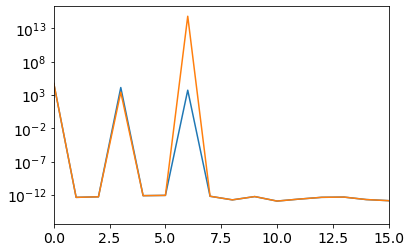

(0.0, 15.0)

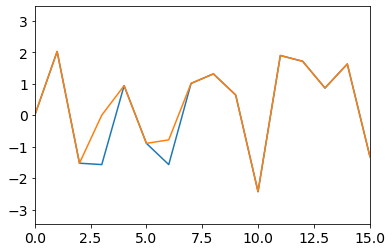

In [581]:
plt.plot(np.abs(pure_fft))
plt.plot(np.abs(new_ex_pure_fft))
plt.xlim(0,15)
plt.yscale("log")
plt.show()
plt.plot(np.angle(pure_fft))
plt.plot(np.angle(new_ex_pure_fft))
plt.xlim(0,15)

In [584]:
normed_fft = np.abs(pure_fft)*fft_norm(len(t),5000)*np.sqrt(2)/np.sqrt(duration)
normed_ex_fft = normed_fft.copy()
normed_ex_fft[3] = 16*np.abs(normed_fft[3])#*np.exp(1j*(np.angle(pure_fft[3])+shift_phase))


(0.01, 150)

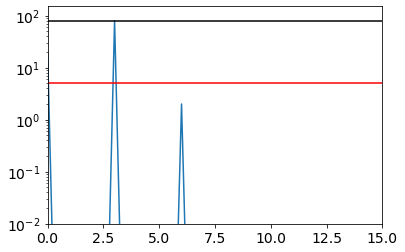

In [585]:
plt.plot(normed_ex_fft)
plt.yscale("log")
plt.xlim(0,15)
plt.axhline(5,color="red")
plt.axhline(16*5,color="black")
plt.ylim(1e-2,150)

(0.0, 5000.0)

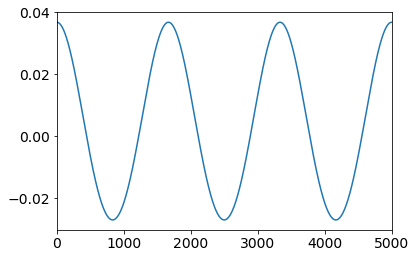

In [590]:
pure_ifft=np.fft.irfft(new_ex_pure_fft)
normed_ifft=np.fft.irfft(normed_ex_fft)

#plt.plot(pure_ifft)
plt.plot(normed_ifft)
#plt.plot(test_sin,alpha=0.5)
#plt.plot(test_shift_sin,alpha=0.5)
plt.xlim(0,5000)

(0.999999, 1.000001)

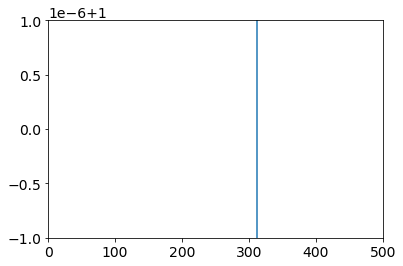

In [571]:
plt.plot(np.divide(pure_ifft,test_shift_sin))
plt.xlim(0,500)
plt.ylim(0.999999,1.000001)

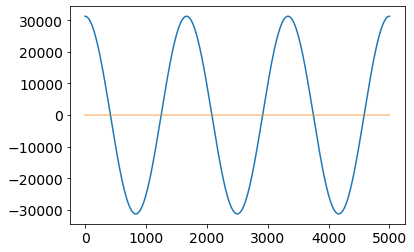

In [2346]:
pure_ifft=np.fft.irfft(new_ex_pure_fft)
plt.plot(pure_ifft)
#plt.plot(test_sin)
plt.plot(test_shift_sin,alpha=0.5)

In [2186]:
period = 5000/(2*3)
t0=5000-period/shift_phase-1
shift = np.exp(-3j*2*np.pi*t0)

In [2187]:
new_pure_fft = pure_fft
new_pure_fft[3] = pure_fft[3] * shift

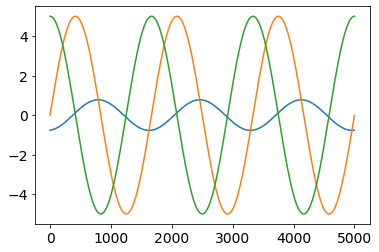

In [2188]:
pure_ifft=np.fft.ifft(new_pure_fft)
plt.plot(pure_ifft)
plt.plot(test_sin)
plt.plot(test_shift_sin)

In [2128]:
pure_fft[3] = pure_fft[3]*shift
print(pure_fft[3],np.angle(pure_fft[3]))


(7274.80952493-10164.9961326j) -0.949629079419


In [ ]:

y=np.asarray(np.imag(pure_fft[3]))
x=np.asarray(np.real(pure_fft[3]))
print(x)
z = np.arctan(y,np.asarray(2.0474804448322944e-13))
print(x)
new_img = np.tan(z*2)*x
print(x)
pure_fft[3]=x+1j*new_img

In [2087]:
np.angle(pure_fft[3])

-1.5707963267948966

In [2189]:
np.real(pure_fft[3])

-3820.1798611007812

In [2190]:
np.imag(pure_fft[3])

11901.942103238447

In [2191]:
np.sqrt((-3820.1798611007812)**2+11901.942103238447**2)



12500.0

In [2192]:
np.angle((-3820.1798611007812))+np.angle(11901.942103238447)

3.1415926535897931

12500.0